In [ ]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3('voyager.mp3')
mono_audios = sound.split_to_mono()
mono_left = mono_audios[0].export(
    "D:\Git\Voyager_Golden_Record\\mono_left.wav",
    format="wav")
mono_right = mono_audios[1].export(
    "D:\Git\Voyager_Golden_Record\\mono_right.wav",
    format="wav")

In [ ]:
# binary number that repesent the length of each wave
WavelengthInBinary = '101101001100000000000000'
WavelengthInDec = int(WavelengthInBinary, 2)
print(f"should be {WavelengthInDec} ")
a = 11845632/300000 
print (a)
# ToDo: find what are the units for this time 11845632 

In [217]:
 #apper on the disk as lines in second image, apper to be the number of waves per image
NumberOfWavesInBinary = '1000000000'
NumberOfWavesInDec = int(NumberOfWavesInBinary, 2)
print(f"should be {NumberOfWavesInDec} images")


should be 512 images


In [ ]:
from pydub import AudioSegment
from pydub.utils import get_array_type
import os
import array
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from scipy.io import wavfile

In [ ]:
wav_fname = "D:\\Git\\Voyager_Golden_Record\\mono_left.wav"
#spio.wavfile.read(wav_fname)
samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate
print(f"length = {length}s")
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:], label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



In [ ]:
#there is a weird beep every 12 second on the audio and it senne it start at 00:30
timesteps = len(time)
#print(timesteps)
offset = samplerate*60
print(offset)
offset = 6227756  
window_size = round(samplerate*0.1)
window_size = 3200
print(samplerate)
fig, axs = plt.subplots(2, 2)

window = data[offset:offset + window_size]
t = range(len(window))
axs[0, 0].plot(t, window)

window = data[offset + window_size:offset + 2*window_size]
t = range(len(window))
axs[1, 0].plot(t, window)

window = data[offset + 2*window_size:offset + 3*window_size]
t = range(len(window))
axs[0, 1].plot(t, window)

window = data[offset + 3*window_size:offset + 4*window_size]
t = range(len(window))
axs[1, 1].plot(t, window)


In [ ]:
from scipy.fft import irfft
#there is a weird beep every 12 second on the audio and it senne it start at 00:30
timesteps = len(time)
#print(timesteps)
offset = samplerate*60
print(offset)
offset = 6227756  
window_size = round(samplerate*0.1)
window_size = 3200
print(samplerate)
fig, axs = plt.subplots(2, 2)
data_inv = irfft(data[offset:offset + 512*window_size])

window = data_inv[0:0 + window_size]
t = range(len(window))
axs[0, 0].plot(t, window)

window = data_inv[0 + window_size:0 + 2*window_size]
t = range(len(window))
axs[1, 0].plot(t, window)

window = data_inv[0 + 2*window_size:0 + 3*window_size]
t = range(len(window))
axs[0, 1].plot(t, window)

window = data_inv[0 + 3*window_size:0 + 4*window_size]
t = range(len(window))
axs[1, 1].plot(t, window)


In [ ]:
image_data = []
offset = 0
scan_width = window_size
adjust_offset = 0
for scan in range(512):
    image_data.append(data_inv[int(offset):int(offset)+scan_width])
    offset += scan_width + adjust_offset
plt.imshow(image_data)
plt.show()

41794099
122.0
122.42517006802721
5398950


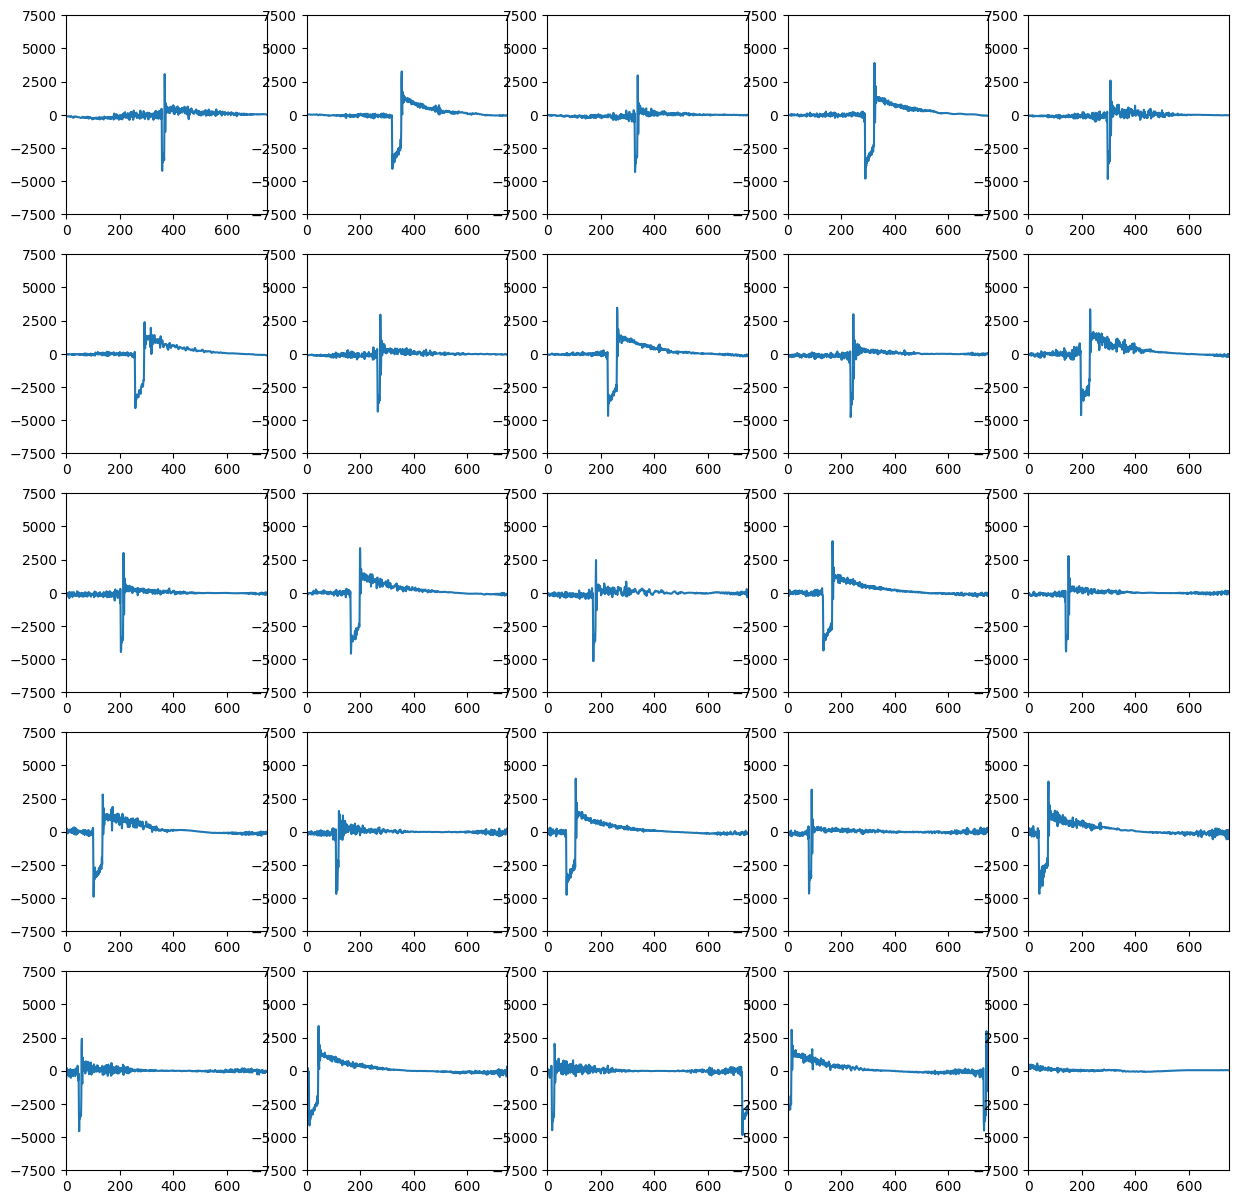

In [216]:
timesteps = len(time)
print(timesteps)
offset = samplerate*122
print(offset/samplerate)

window_size = 750
#window_size = 3200
print((offset+25*window_size)/samplerate)
print(offset+25*window_size)
a = 5  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(a, b, c)
    plt.plot(-1*data[offset + window_size*i:offset + window_size*(i+1)])
    plt.axis([0,window_size,-7500,7500])
    c = c + 1



# for index in range(2):
#     print(index)
#     window = data[offset:offset + window_size]
#     t = range(len(window))
#     axs[index].plot(t,window)



41794099
122.0
147.0
6482700


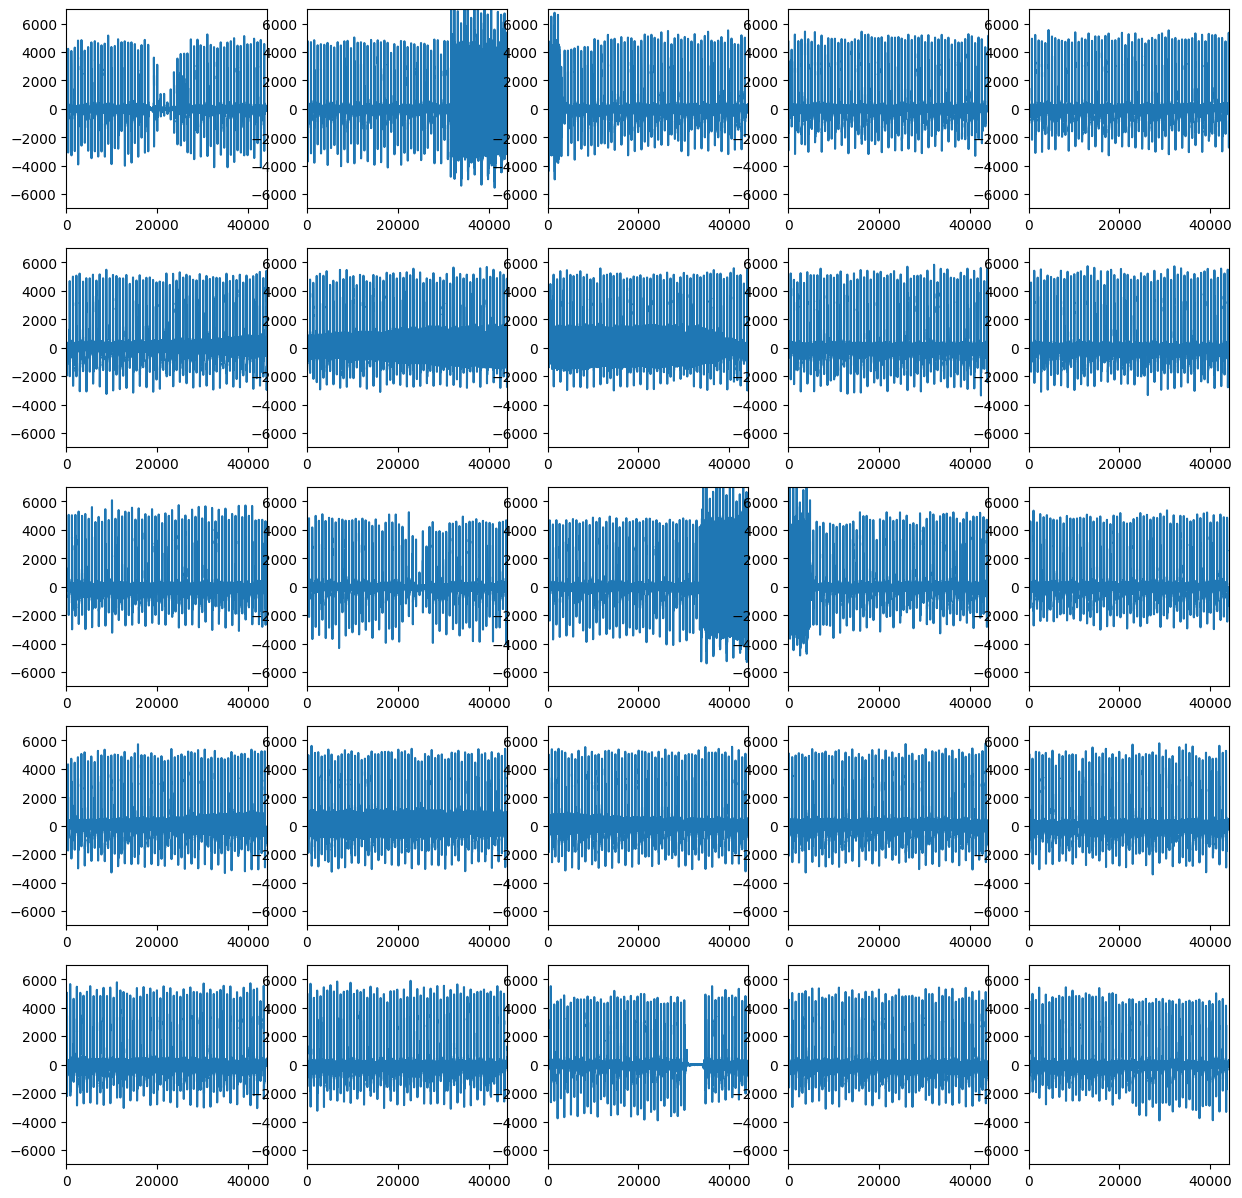

In [167]:
#plot a 5000 window every second
timesteps = len(time)
print(timesteps)
offset = round(samplerate*122)
#offset = 50000  
print(offset/samplerate)

window_size = samplerate
#window_size = 3200
print(offset/samplerate+25)
print(offset+25*samplerate)
a = 5  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(a, b, c)
    plt.plot(data[offset + samplerate*i :offset + samplerate*i + window_size])
    plt.axis([0, window_size, -7000, 7000])

    c = c + 1


41794099
122.0
5380200
122.42517006802721
5398950


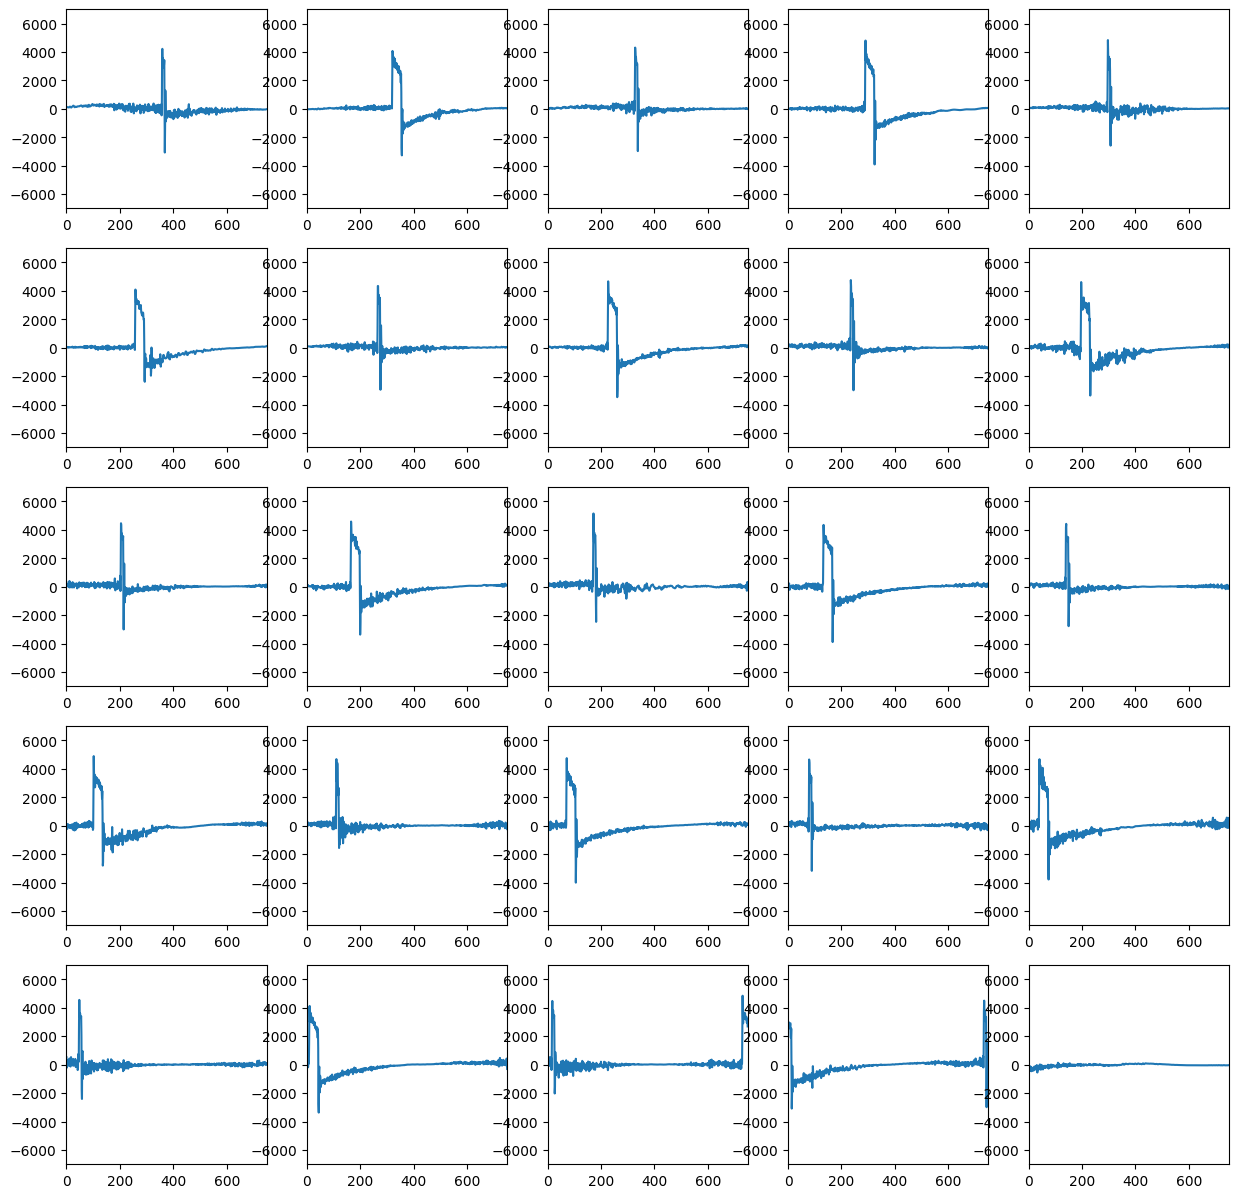

In [168]:
timesteps = len(time)
print(timesteps)
offset = round(samplerate*182.82)
offset = round(samplerate*122)

#offset = offset + 5000*12
print(offset/samplerate)
print(offset)

window_size = 750
#window_size = 3200
print((offset+25*window_size)/samplerate)
print(offset+25*window_size)
a = 5  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(a, b, c)
    plt.plot(data[offset + window_size*i:offset + window_size*(i+1)])
    plt.axis([0, window_size, -7000, 7000])

    c = c + 1


In [ ]:
SignalStartingPoint = 65*1000/samplerate #looks like the first wave start at 63*1000 divided by samplerate
print(f"Signal start at {SignalStartingPoint}[s]")

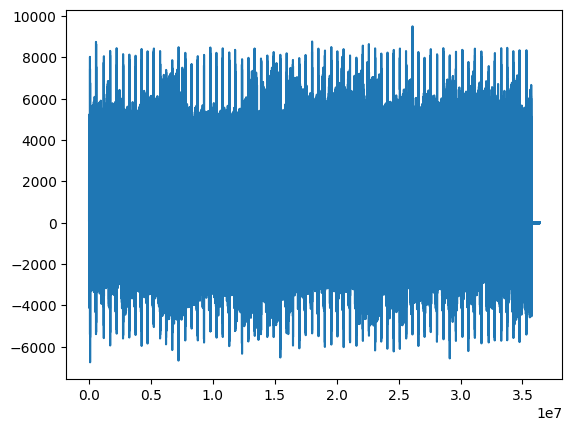

In [211]:
offset = round(samplerate*122)
window_size = 736
window = data[offset + window_size*0:offset + window_size*(512000)]
plt.plot(range(len(window)), window[:], label="Left channel")


In [212]:
line_hz = samplerate / window_size
from scipy.signal import butter, filtfilt
N = 3
nyquist = samplerate / 2
Wn = line_hz / nyquist
b, a = butter(N, Wn/2, 'high')


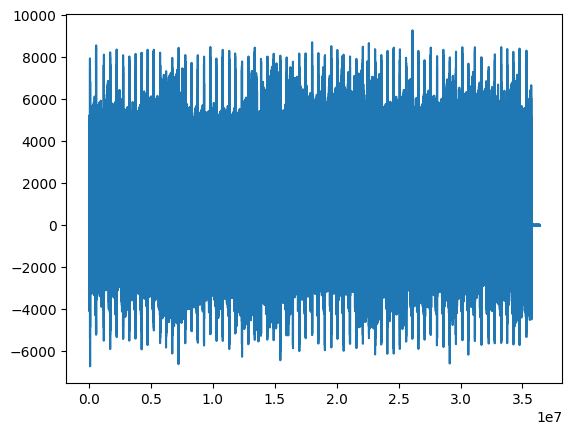

In [213]:

x = filtfilt(b, a, window)
plt.plot(range(len(x)), x[:], label="Left channel")
cols = int(window_size)
rows = 512
x = x[0:cols * rows]
mat = np.reshape(x, (rows, cols))
mat.shape
offset_pct = 0.05
offset = rows * offset_pct


25.6


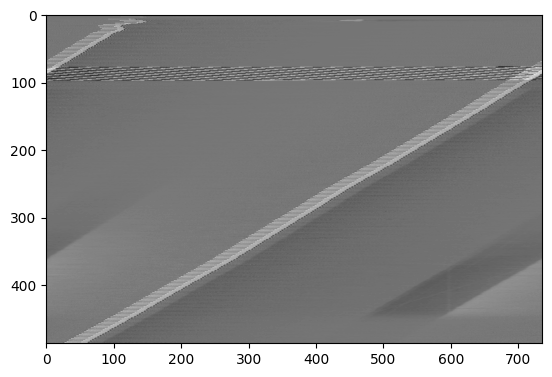

In [215]:

print(offset)
plt.imshow(mat[int(offset):int(offset)+cols], cmap='gray')

In [ ]:
offset = round(samplerate*30)
window_size = 750
data_window = np.array(data[offset : offset + samplerate*5])
x1, x2 = np.min(data_window), np.max(data_window)
y1, y2 = 0, 255.0
m = (y2 - y1) / (x2 - x1)
b = y2 - (m * x2)
data_rescaled_colors = ((m * data_window) + b).astype(np.uint8)
image = Image.fromarray(data_rescaled_colors)
image.show()


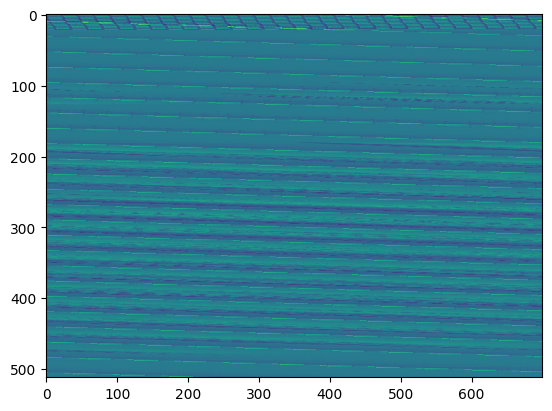

In [105]:
image_data = []
offset = round(samplerate*184.25)
scan_width = 700
adjust_offset = 0
for scan in range(512):
    image_data.append(data[int(offset):int(offset)+scan_width])
    offset += scan_width + adjust_offset
plt.imshow(image_data)
plt.show()

In [ ]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn')

In [ ]:

from scipy.signal import savgol_filter
w = savgol_filter(window, 100, 3)
plt.plot(t, w, 'b')  # high frequency noise removed


In [ ]:
#working
from scipy.signal import butter, filtfilt
image_data = []
scan_width = 2200
line_hz = samplerate / scan_width
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = 0
for scan in range(180):
    offset = samplerate*30 +2300 
    window = data[offset+scan*scan_width:offset+2200+scan*scan_width]
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[1150:1800])
plt.imshow(image_data,cmap="gray")
plt.show()